# candyANOVAtest: ANOVA bootstrap for final exam

This exercise is based on data from the federal reserve, accessed via
kaggle: https://www.kaggle.com/rtatman/us-candy-production-by-month

Exercise written by RAS 10/17
Simplified to use data that has been pre-sorted by season: RTB 24 Oct
2017. Converted to Python from Matlab by EB 15 Oct 2021.

Questions: 
- How does candy production vary throughout the year?
- Which months have the greatest candy production?
- Which season has the greatest candy production?


In [ ]:
# Imports
import numpy as np
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
import statsmodels.stats
import statsmodels.api as sm

## Import and plot data

In [ ]:
# Download data from google drive
!gdown --id 1xidD-gylFncROvj2nGcblTfp3lgNvHLL

season_sums = pd.read_excel('/content/candy-production-by-season.xlsx')

season_sums.head()

Downloading...
From: https://drive.google.com/uc?id=1xidD-gylFncROvj2nGcblTfp3lgNvHLL
To: /content/candy-production-by-season.xlsx
100% 11.4k/11.4k [00:00<00:00, 30.4MB/s]


Winter    Spring    Summer      Fall
0  274.5370  195.5974  207.5266  287.5713
1  277.5293  211.5918  220.0847  292.7639
2  206.6011  219.1705  216.8290  270.5163
3  265.3275  171.2579  192.5739  268.2896
4  301.3253  197.0313  209.1130  296.4706

In [ ]:
# format data for ANOVA
season_means = season_sums.mean()
season_CI = 1.96 * (season_sums.std() / np.sqrt(season_sums.shape[0]))

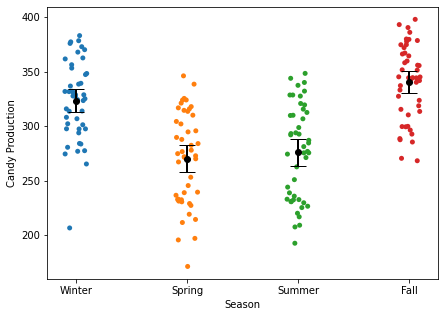

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))

# Jitter the data so we can see it all
sns.stripplot(data = season_sums, ax = ax, zorder = 0)

# Add confidence intervals
ax.errorbar(np.arange(4), season_means, yerr = season_CI, linestyle = '', 
           marker = 'o', linewidth = 2, capsize = 8, color = 'k')

# Could have also used below to add CIs more easily (in a more seaborn-y way) 
#sns.pointplot(data = season_sums, color = 'k', join = False)

ax.set(xlabel = 'Season', ylabel = 'Candy Production');

Is there a visible pattern of candy production by season? Are there any
other sensible ways to split up the data other than by season?


# Does candy production differ by season? ANOVA approach

One way to answer this question is by using One-way ANOVA on the data in `season_sums`



In [ ]:
fstatistic, p_val = scipy.stats.f_oneway(...) # your code here
print(fstatistic)
print(p_val)

TypeError: ignored

What does this suggest about our data? Are all seasons drawn from the same distribution?

# Does candy production differ by season? Permutation test


HINT: You want to shuffle all of the data as if you had misplaced all of
the season labels, but then reformat the data so that it looks like your
original data set (i.e. separated into four columns of 'fake' seasons),
then run the ANOVA to get the F-statistic

HINT: There are multiple ways to do this in Python - I used trusty numpy instead of pandas


In [ ]:
n_perm = 1000

# variable to hold each permuted F-statistic
boot_fs = np.zeros((n_perm, ))

... # !! your code here
for k in range(n_perm):

    # Shuffle the data
    ...

    #  Re-format into original shape (there may be an alternative approach that doesn't follow these steps)
    ...
    # Perform a 1-way ANOVA:
    ...
    
    # Save the f statistics
    boot_fs[k] = fstatistic


# Plot a distribution of the Fs we got under H0 


In [ ]:
... # your code here

# Compare your observed F-statistic to the permuted distribution


What is your p-value?


In [ ]:
... # !!! Your code here

Ellipsis